In [1]:
import graphviz

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
import matplotlib.pyplot as plt
import os
os.environ["PATH"] +=os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [13]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [17]:
df[df.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(1359, 12)

In [24]:
df.reset_index(drop=True,inplace=True)

In [26]:
df.index.values

array([   0,    1,    2, ..., 1356, 1357, 1358], dtype=int64)

In [45]:
np.set_printoptions()
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,chi2
SKBest = SelectKBest(chi2,k=11).fit(df.iloc[:,:-1],df.iloc[:,-1])
p_List =pd.Series(SKBest.pvalues_)
Score_List =pd.Series(SKBest.scores_)
print(SKBest.get_support(indices=True))
Selected_features = pd.Series(df.iloc[:,:-1].columns[SKBest.get_support()])

[ 0  1  2  3  4  5  6  7  8  9 10]


In [50]:
FeatureDTFrame =pd.concat([p_List,Score_List,Selected_features],axis=1)
FeatureDTFrame.columns=['P_Value_List','Score_Value_List','Features']
FeatureDTFrame = FeatureDTFrame.sort_values(by='P_Value_List',ascending=True,axis=0).reset_index(drop=True)

In [51]:
FeatureDTFrame

,P_Value_List,Score_Value_List,Features
0,$0.00,"$2,538.40",total sulfur dioxide
1,$0.00,$162.30,free sulfur dioxide
2,$0.00,$42.15,alcohol
3,$0.01,$14.17,volatile acidity
4,$0.05,$10.83,citric acid
5,$0.10,$9.27,fixed acidity
6,$0.53,$4.13,residual sugar
7,$0.57,$3.85,sulphates
8,$0.98,$0.74,chlorides
9,$1.00,$0.16,pH


In [53]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [91]:
print(FeatureDTFrame.Features[0:5])
X=df.loc[:,list(FeatureDTFrame.Features[0:5])]
Y=df.loc[:,['quality']]

0    total sulfur dioxide
1     free sulfur dioxide
2                 alcohol
3        volatile acidity
4             citric acid
Name: Features, dtype: object


In [201]:
dTree_1= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=30,random_state=4)
dTree_1.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

In [233]:
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':dTree_1.feature_importances_})
feature_importance.sort_values(by='importance',ascending=True,inplace=True)
feature_importance

,feature,importance
1,free sulfur dioxide,$0.00
4,citric acid,$0.00
5,fixed acidity,$0.00
6,residual sugar,$0.00
8,chlorides,$0.00
9,pH,$0.00
3,volatile acidity,$0.11
0,total sulfur dioxide,$0.12
7,sulphates,$0.19
2,alcohol,$0.58


In [202]:
(FeatureDTFrame.Features[0:8])

0    total sulfur dioxide
1     free sulfur dioxide
2                 alcohol
3        volatile acidity
4             citric acid
5           fixed acidity
6          residual sugar
7               sulphates
Name: Features, dtype: object

In [199]:
print(Y.iloc[[5],:])
dTree.predict(X.iloc[[5]])
#X.iloc[[5,6],:].shape

   quality
5        5


array([5], dtype=int64)

## MIN_SAMPLES_LEAFS ANALYSIS

Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 1000


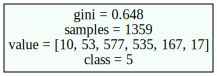

In [217]:
dTree_min_samples_nodes_1= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=1000,random_state=4)
dTree_min_samples_nodes_1.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_min_samples_nodes_1,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 1000')
display(tempSVG)

Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500


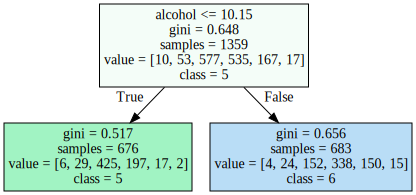

In [218]:
dTree_min_samples_nodes_2= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=500,random_state=4)
dTree_min_samples_nodes_2.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_min_samples_nodes_2,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500')
display(tempSVG)

Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500


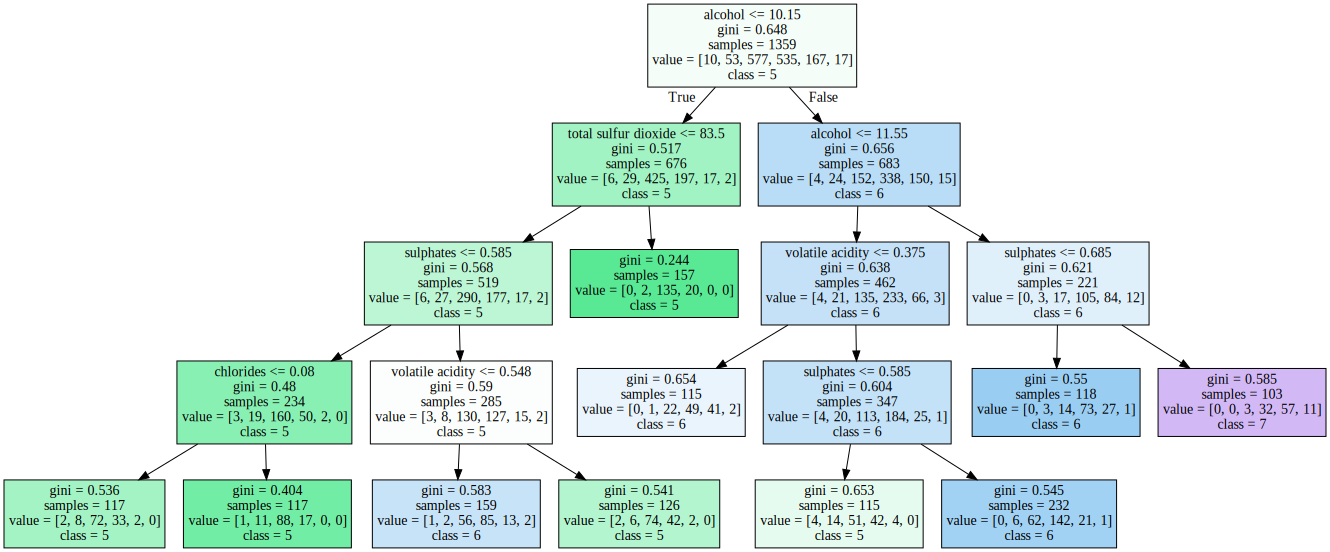

In [219]:
dTree_min_samples_nodes_3= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=100,random_state=4)
dTree_min_samples_nodes_3.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_min_samples_nodes_3,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500')
display(tempSVG)

## MAX DEPTH ANALYSIS

Max_depth is 1 and max_leaf_nodes is 10 while min_samples_leaf is 10


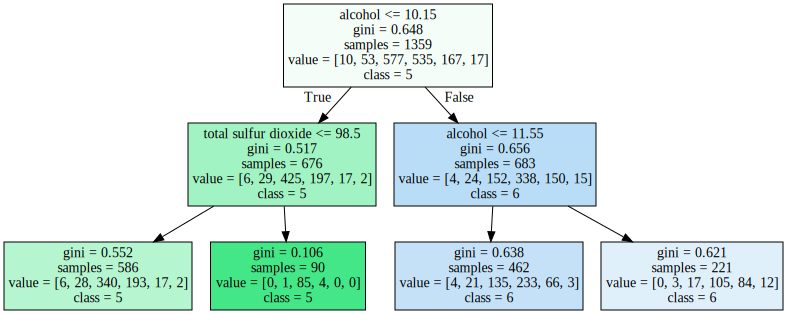

In [220]:
dTree_Max_Depth_1= DecisionTreeClassifier(criterion='gini',max_depth=1,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_1.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Depth_1,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 1 and max_leaf_nodes is 10 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 2 and max_leaf_nodes is 10 while min_samples_leaf is 10


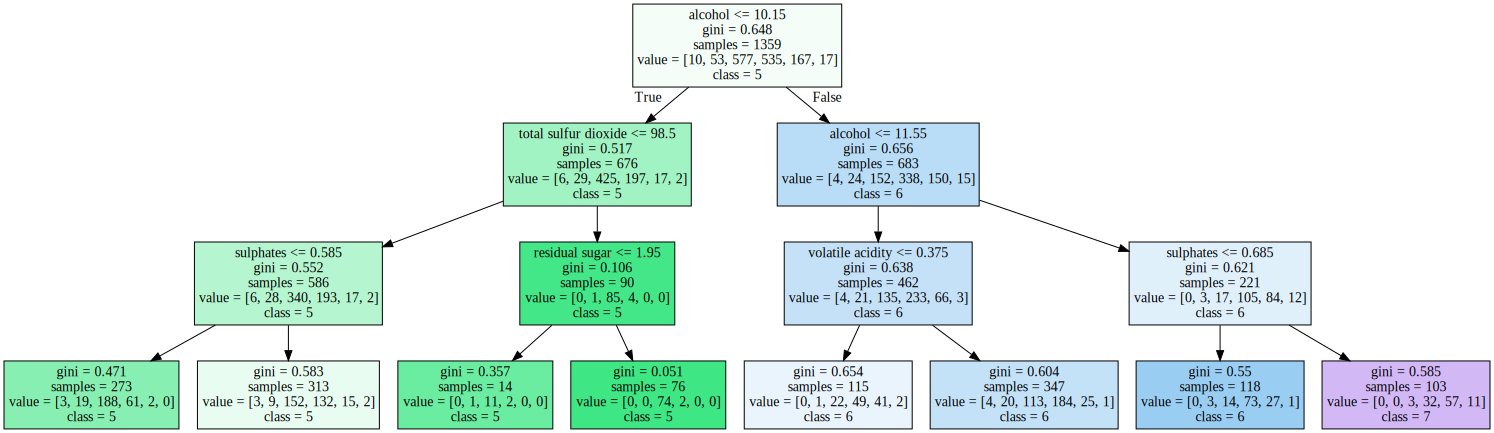

In [221]:
dTree_Max_Depth_2= DecisionTreeClassifier(criterion='gini',max_depth=2,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_2.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Depth_2,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 2 and max_leaf_nodes is 10 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10


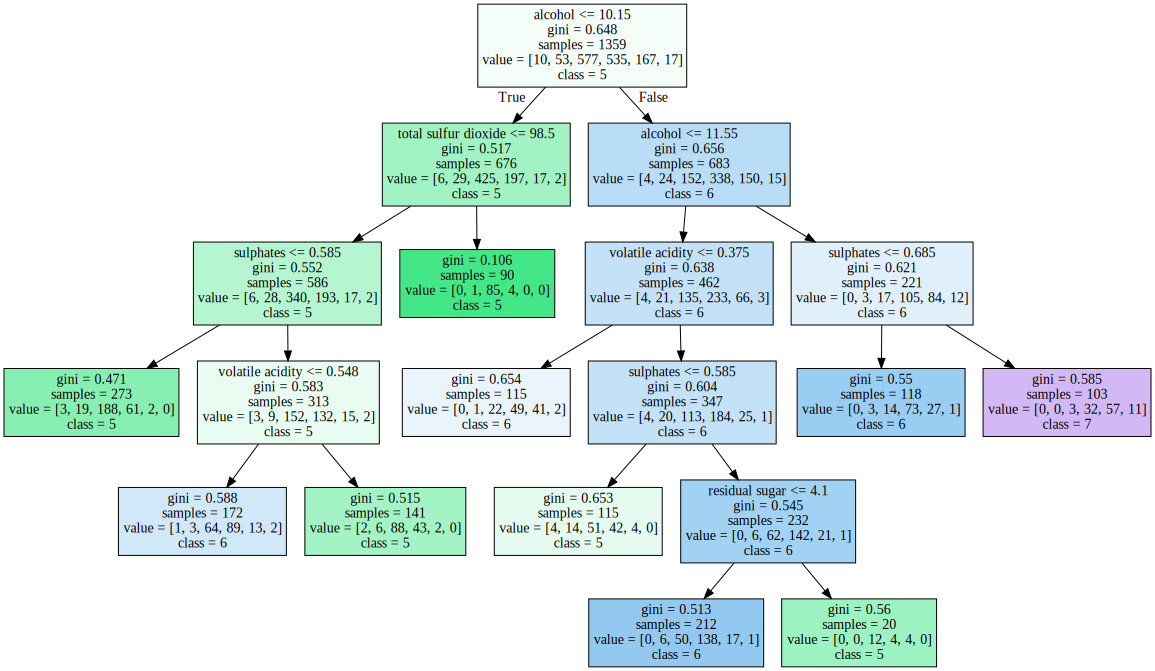

In [223]:
dTree_Max_Depth_3= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_3.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Depth_3,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10')
display(tempSVG)

##  MAX_LEAF_NODES_ANALYSIS

Max_depth is 5 and max_leaf_nodes is 2 while min_samples_leaf is 10


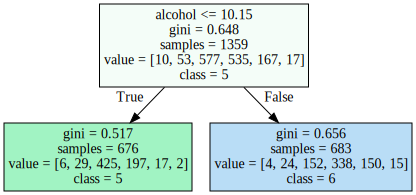

In [228]:
dTree_Max_Leaf_Nodes_1= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=2,min_samples_leaf=10,random_state=4)
dTree_Max_Leaf_Nodes_1.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Leaf_Nodes_1,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 2 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 5 and max_leaf_nodes is 3 while min_samples_leaf is 10


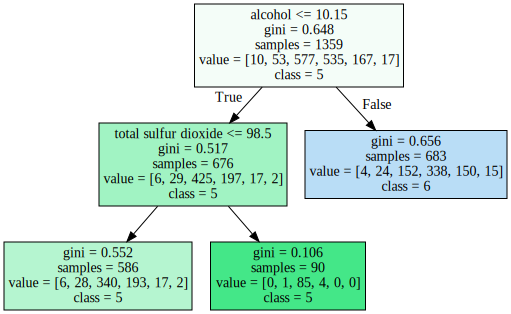

In [229]:
dTree_Max_Leaf_Nodes_2= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=3,min_samples_leaf=10,random_state=4)
dTree_Max_Leaf_Nodes_2.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Leaf_Nodes_2,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 3 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10


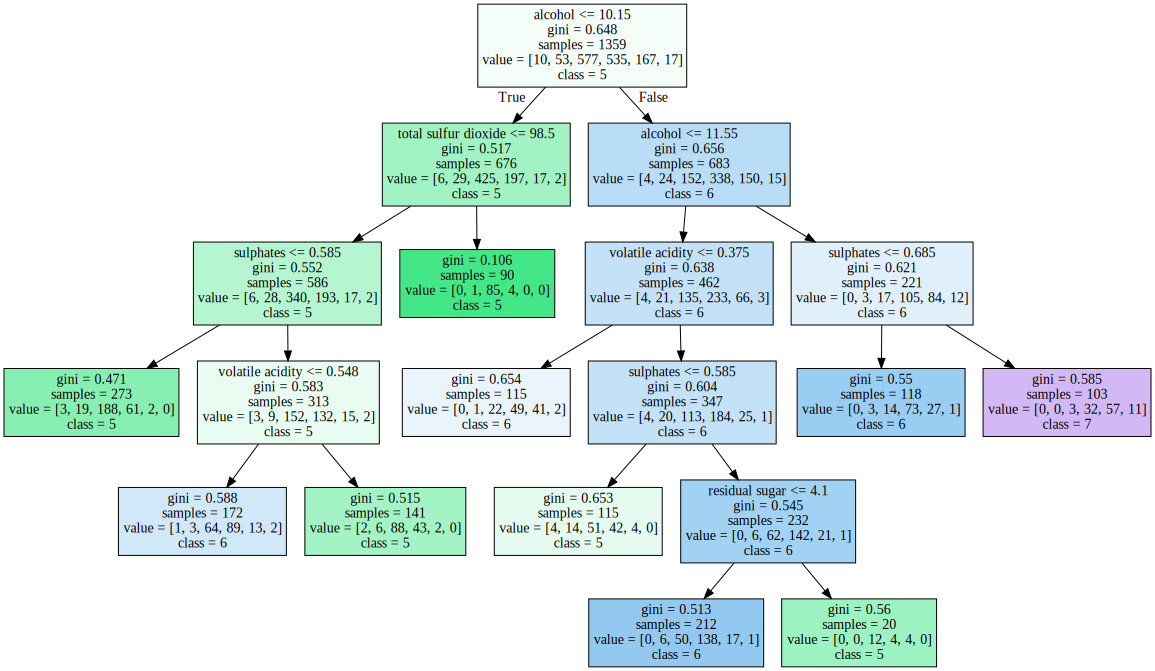

In [230]:
dTree_Max_Leaf_Nodes_3= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Leaf_Nodes_3.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Leaf_Nodes_3,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10')
display(tempSVG)